### Improt Library

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import joblib


### Import Dataset 

In [48]:
Data = pd.read_csv("housing_price_dataset.csv")
Data.head

<bound method NDFrame.head of        SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]>

In [49]:
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [50]:
Data[Data['Price']<0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


In [51]:
Data['Price'] =Data['Price'].apply(lambda x : np.nan if x<0 else x)
Data[Data['Price'].isna()]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,NaN
2310,1036,4,1,Suburb,1983,NaN
3630,1235,3,2,Rural,2012,NaN
4162,1352,5,2,Suburb,1977,NaN
5118,1140,4,1,Urban,2020,NaN
5951,1097,4,3,Rural,1981,NaN
6355,1016,5,2,Rural,1997,NaN
8720,1235,3,1,Urban,1952,NaN
9611,1131,3,3,Urban,1959,NaN
10597,1177,2,3,Urban,2010,NaN


In [52]:
#examining mean prices for bedrooms in Urban areas
urban_2B = Data.loc[(Data['Neighborhood'] == 'Urban') & (Data['Bedrooms'] == 2), 'Price'].mean()
urban_3B = Data.loc[(Data['Neighborhood'] == 'Urban') & (Data['Bedrooms'] == 3), 'Price'].mean()
urban_3BPlus = Data.loc[(Data['Neighborhood'] == 'Urban') & (Data['Bedrooms'] > 2), 'Price'].mean()
(urban_2B,urban_3B, urban_3BPlus)

(np.float64(220269.62675298468),
 np.float64(223853.7787688552),
 np.float64(229662.11030178345))

In [53]:
#examining mean prices for bedrooms in SubUrban areas
Suburban_2B = Data.loc[(Data['Neighborhood'] == 'Suburb') & (Data['Bedrooms'] == 2), 'Price'].mean()
Suburban_3B = Data.loc[(Data['Neighborhood'] == 'Suburb') & (Data['Bedrooms'] == 3), 'Price'].mean()
Suburban_3BPlus = Data.loc[(Data['Neighborhood'] == 'Suburb') & (Data['Bedrooms'] > 2), 'Price'].mean()
(Suburban_2B,Suburban_3B, Suburban_3BPlus)

(np.float64(216300.12821896185),
 np.float64(220397.8572927736),
 np.float64(225606.07221660748))

In [54]:
#examining mean prices for bedrooms in Rural areas
Rural_2B = Data.loc[(Data['Neighborhood'] == 'Rural') & (Data['Bedrooms'] == 2), 'Price'].mean()
Rural_3B = Data.loc[(Data['Neighborhood'] == 'Rural') & (Data['Bedrooms'] == 3), 'Price'].mean()
Rural_3BPlus = Data.loc[(Data['Neighborhood'] == 'Rural') & (Data['Bedrooms'] > 2), 'Price'].mean()
(Rural_2B,Rural_3B, Rural_3BPlus)

(np.float64(218378.9478586118),
 np.float64(219220.23126468417),
 np.float64(226121.87917547236))

In [55]:
#Imputation Urban
Data.loc[(Data['Neighborhood'] == 'Urban') & (Data['Bedrooms'] == 2) & (Data['Price'].isna()), 'Price'] = urban_2B
Data.loc[(Data['Neighborhood'] == 'Urban') & (Data['Bedrooms'] == 3) & (Data['Price'].isna()), 'Price'] = urban_3B
Data.loc[(Data['Neighborhood'] == 'Urban') & (Data['Bedrooms'] > 2) & (Data['Price'].isna()), 'Price'] = urban_3BPlus

In [56]:
#Imputation SubUrban
Data.loc[(Data['Neighborhood'] == 'Suburb') & (Data['Bedrooms'] == 2) & (Data['Price'].isna()), 'Price'] = Suburban_2B
Data.loc[(Data['Neighborhood'] == 'Suburb') & (Data['Bedrooms'] == 3) & (Data['Price'].isna()), 'Price'] = Suburban_3B
Data.loc[(Data['Neighborhood'] == 'Suburb') & (Data['Bedrooms'] > 2) & (Data['Price'].isna()), 'Price'] = Suburban_3BPlus

In [57]:
#Imputation Rural
Data.loc[(Data['Neighborhood'] == 'Rural') & (Data['Bedrooms'] == 2) & (Data['Price'].isna()), 'Price'] = Rural_2B
Data.loc[(Data['Neighborhood'] == 'Rural') & (Data['Bedrooms'] == 3) & (Data['Price'].isna()), 'Price'] = Rural_3B
Data.loc[(Data['Neighborhood'] == 'Rural') & (Data['Bedrooms'] > 2) & (Data['Price'].isna()), 'Price'] = Rural_3BPlus

In [58]:
#checking if any price values are negative
Data[Data['Price'].isna()]
Data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224931.224624
std,575.513241,1.116326,0.815851,20.719377,75979.001927
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1513.000000,3.000000,1.000000,1967.000000,170016.992602
50%,2007.000000,3.000000,2.000000,1985.000000,225107.907437
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


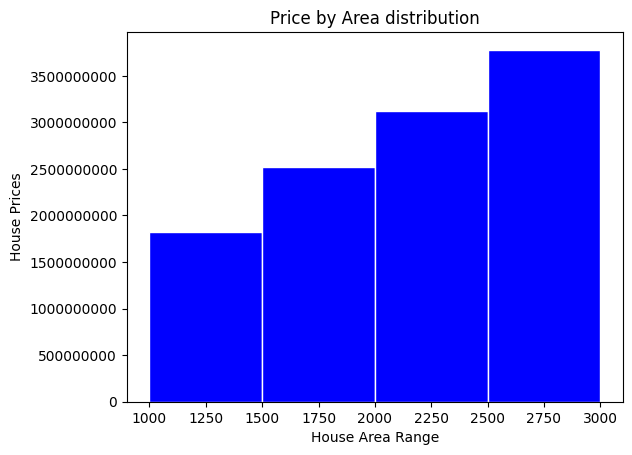

In [59]:
## Price by sq ft area
maxval=Data['SquareFeet'].max()
minval=Data['SquareFeet'].min()
area_bin=list(range(minval,maxval+500,500))

plt.hist(Data['SquareFeet'], bins=area_bin, weights=Data['Price'],color='blue', edgecolor="white")
plt.title('Price by Area distribution')
plt.ticklabel_format(style='plain')
plt.xlabel('House Area Range')
plt.ylabel('House Prices')
plt.show()

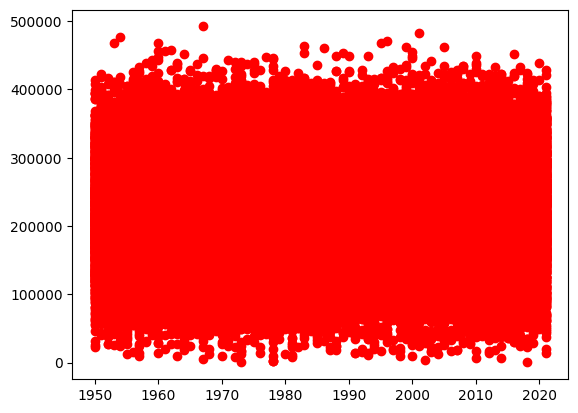

In [60]:
plt.scatter(Data['YearBuilt'], Data['Price'], color='red')
plt.show()

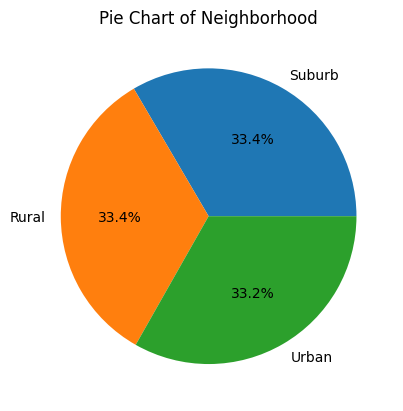

In [61]:
counts = Data['Neighborhood'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of ' + 'Neighborhood')
plt.show()

In [62]:
#converting object 
cat_col=Data.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(Data,columns=cat_col, drop_first=False)
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,True,False,False
1,2459,3,2,1980,195014.221626,True,False,False
2,1860,2,1,1970,306891.012076,False,True,False
3,2294,2,1,1996,206786.787153,False,False,True
4,2130,5,2,2001,272436.239065,False,True,False


In [63]:
# One-hot encode neighborhood
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,True,False,False
1,2459,3,2,1980,195014.221626,True,False,False
2,1860,2,1,1970,306891.012076,False,True,False
3,2294,2,1,1996,206786.787153,False,False,True
4,2130,5,2,2001,272436.239065,False,True,False
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,True,False,False
49996,2854,2,2,1988,374507.656727,False,True,False
49997,2979,5,3,1962,384110.555590,False,True,False
49998,2596,5,2,1984,380512.685957,True,False,False


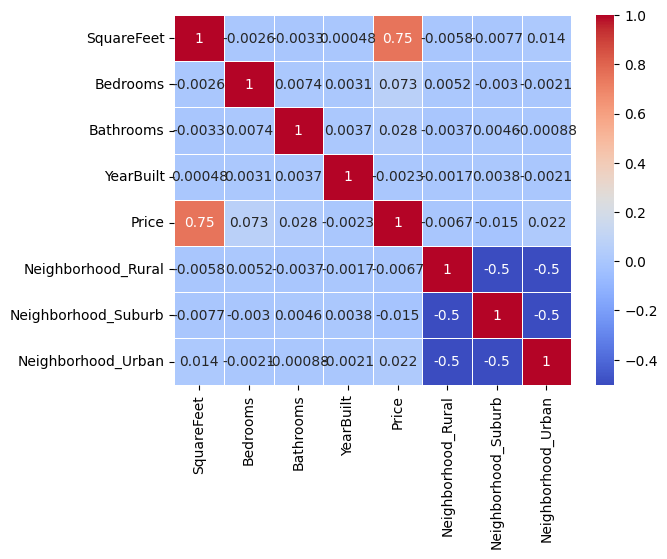

In [64]:
#generating correlation matrix,where price seems to be highly correlated to squarefeet  of the house
corr=df.corr()
corr
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [65]:
#defining dependent and independent variables
X = df.drop('Price', axis=1)
Y = df['Price']

#splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.20,random_state=54)

linearregression = LinearRegression()

In [66]:
linearregression.fit(X_train,Y_train)

LinearRegression()

In [67]:
#predicting 
Y_pred=linearregression.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Squared Error: {mape}')

Mean Squared Error: 2483106703.760212
R-squared: 0.5678574361115498
Mean Absolute Squared Error: 23.975872634217477


In [68]:

#splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.20,random_state=0)

linearregression = LinearRegression()

linearregression.fit(X_train,Y_train)

#predicting 
Y_pred=linearregression.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
# คะแนนบนข้อมูลฝึก
train_score = linearregression.score(X_train, Y_train)
print(f"Training score (R^2): {train_score:.4f}")

# คะแนนบนข้อมูลทดสอบ
test_score = linearregression.score(X_test, Y_test)
print(f"Test score (R^2): {test_score:.4f}")

# Save the model
joblib.dump(linearregression, 'linear_regression_model.pkl')

Training score (R^2): 0.5696
Test score (R^2): 0.5696


['linear_regression_model.pkl']

In [69]:

# Defining dependent and independent variables
X = df.drop('Price', axis=1)
Y = df['Price']

# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=54)

# 1. Linear Regression
linearregression = LinearRegression()
linearregression.fit(X_train, Y_train)
Y_pred_lr = linearregression.predict(X_test)

mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, Y_train)
Y_pred_poly = poly_reg_model.predict(X_poly_test)

mse_poly = mean_squared_error(Y_test, Y_pred_poly)
r2_poly = r2_score(Y_test, Y_pred_poly)

# 3. StandardScaler with Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_lr_model = LinearRegression()
scaled_lr_model.fit(X_train_scaled, Y_train)
Y_pred_scaled_lr = scaled_lr_model.predict(X_test_scaled)

mse_scaled_lr = mean_squared_error(Y_test, Y_pred_scaled_lr)
r2_scaled_lr = r2_score(Y_test, Y_pred_scaled_lr)

# Print comparison results
print("Model Performance Comparison:")
print(f"Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}")
print(f"Polynomial Regression - MSE: {mse_poly}, R^2: {r2_poly}")
print(f"Standard Scaled Linear Regression - MSE: {mse_scaled_lr}, R^2: {r2_scaled_lr}")


Model Performance Comparison:
Linear Regression - MSE: 2483106703.760212, R^2: 0.5678574361115498
Polynomial Regression - MSE: 2485214821.818226, R^2: 0.5674905539549392
Standard Scaled Linear Regression - MSE: 2483000610.424078, R^2: 0.5678758998554634
